# [Wrap-up quiz 6](https://inria.github.io/scikit-learn-mooc/ensemble/ensemble_wrap_up_quiz.html)

In [1]:
import pandas as pd

dataset = pd.read_csv('./datasets/penguins.csv')

In [2]:
feature_names = [
    'Culmen Length (mm)',
    'Culmen Depth (mm)',
    'Flipper Length (mm)',
]
target_name = 'Body Mass (g)'

dataset = dataset[feature_names + [target_name]].dropna(axis='rows', how='any')
dataset = dataset.sample(frac=1, random_state=0).reset_index(drop=True)
data, target = dataset[feature_names], dataset[target_name]

## Evaluating a decision tree vs random forest regressor

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
decision_tree = DecisionTreeRegressor(random_state=0)

In [5]:
from sklearn.model_selection import cross_validate

cv_dt = cross_validate(
    decision_tree, data, target, cv=10, return_train_score=True
)

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
random_forest = RandomForestRegressor(random_state=0)

In [8]:
cv_rf = cross_validate(
    random_forest, data, target, cv=10, return_train_score=True
)

### How many times is random forest better than decision trees?

In [9]:
cv_rf['test_score']

array([0.78812533, 0.77436104, 0.88871396, 0.84661427, 0.78043644,
       0.85771461, 0.79185662, 0.73543268, 0.76485281, 0.8077531 ])

In [10]:
cv_dt['test_score']

array([0.59650558, 0.66957713, 0.7193112 , 0.8184209 , 0.6242818 ,
       0.72483157, 0.53090702, 0.51655398, 0.58421785, 0.49038086])

In [11]:
import numpy as np

np.count_nonzero(cv_rf['test_score'] < cv_dt['test_score'].max())

7

Answer: [7, 10] the random forest model is substaintially better than the single decision tree regressor

### Random forest with 5 and another with 100 decision trees

In [12]:
random_forest_small = RandomForestRegressor(n_estimators=5, random_state=0)

random_forest_big = RandomForestRegressor(n_estimators=100, random_state=100)

cv_rf_small = cross_validate(
    random_forest_small, data, target, cv=10, return_train_score=True
)

cv_rf_big = cross_validate(
    random_forest_big, data, target, cv=10, return_train_score=True
)

### How many times is random forest big better than small?

In [13]:
cv_rf_big['test_score']

array([0.79424107, 0.78426869, 0.88588674, 0.84682461, 0.77093058,
       0.85764216, 0.77984069, 0.74848241, 0.77266049, 0.81816292])

In [14]:
cv_rf_small['test_score']

array([0.77235183, 0.65802718, 0.85849519, 0.82029064, 0.78921964,
       0.85126513, 0.77881189, 0.6144532 , 0.76453205, 0.7611934 ])

In [15]:
np.count_nonzero(cv_rf_big['test_score'] < cv_rf_small['test_score'].max())

9

Answer: [7, 10]: the random forest model with 100 decision trees is substantioally better than the random forest model with 5 decision trees

## Validation curves

### Default random forest

In [16]:
from sklearn.model_selection import validation_curve

In [17]:
param_name = 'n_estimators'
param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000]
model = RandomForestRegressor(random_state=0)

In [18]:
train_scores, validation_scores = validation_curve(
    model, data, target,
    param_name=param_name, param_range=param_range,
    cv=10,
)

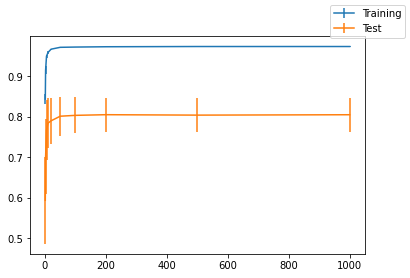

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.errorbar(
    param_range, train_scores.mean(axis=1),
    yerr=train_scores.std(axis=1),
    label='Training'
)

plt.errorbar(    param_range, validation_scores.mean(axis=1),
    yerr=validation_scores.std(axis=1),
    label='Test',
)
fig.legend()

### Random Forest with `max_depth=5`

In [19]:
model_shallow = RandomForestRegressor(max_depth=5, random_state=0)

In [20]:
train_scores_shallow, validation_scores_shallow = validation_curve(
    model_shallow, data, target,
    param_name=param_name, param_range=param_range,
    cv=10,
)

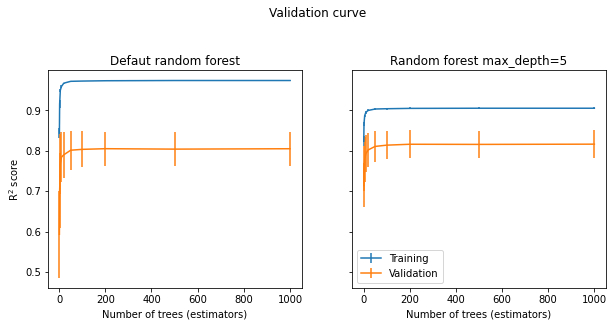

In [27]:
fig, axs = plt.subplots(
    ncols=2, sharex=True, sharey=True, figsize=(10,4)
)

# rf train score
axs[0].errorbar(
    param_range,
    train_scores.mean(axis=1),
    yerr=train_scores.std(axis=1),
    label='Training',
)
# rf validation score
axs[0].errorbar(
    param_range,
    validation_scores.mean(axis=1),
    yerr=validation_scores.std(axis=1),
    label='Validation'
    
)
axs[0].set_title('Defaut random forest')
axs[0].set_xlabel('Number of trees (estimators)')
axs[0].set_ylabel(r'R$^2$ score')

# rf_shallow train score
axs[1].errorbar(
    param_range,
    train_scores_shallow.mean(axis=1),
    yerr=train_scores_shallow.std(axis=1),
    label="Training",
)
# rf_shallow validation score
axs[1].errorbar(
    param_range,
    validation_scores_shallow.mean(axis=1),
    yerr=validation_scores_shallow.std(axis=1),
    label='Validation',
)
axs[1].set_title('Random forest max_depth=5')
axs[1].set_xlabel('Number of trees (estimators)')

plt.legend()
_ = fig.suptitle('Validation curve', y=1.1)

### Random forest with a single tree

In [31]:
rf_1_tree = RandomForestRegressor(n_estimators=1, random_state=0)
cv_results_tree = cross_validate(
    rf_1_tree, data, target, cv=10, return_train_score=True
)
cv_results_tree['train_score']

array([0.83120264, 0.83309064, 0.83195043, 0.84834224, 0.85790323,
       0.86235297, 0.84791111, 0.85183089, 0.82241954, 0.85045978])

In [32]:
tree = DecisionTreeRegressor(random_state=0)
cv_results_tree = cross_validate(
    tree, data, target, cv=10, return_train_score=True
)
cv_results_tree["train_score"]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## `HistGradientBoostingRegressor`

In [33]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [35]:
param_name ='max_iter'
param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000]

In [36]:
hgbr = HistGradientBoostingRegressor(random_state=0)

In [38]:
hgbr_train_scores, hgbr_validation_scores = validation_curve(
    hgbr,
    param_name=param_name, param_range=param_range,
    X=data, y=target,
    n_jobs=4
)

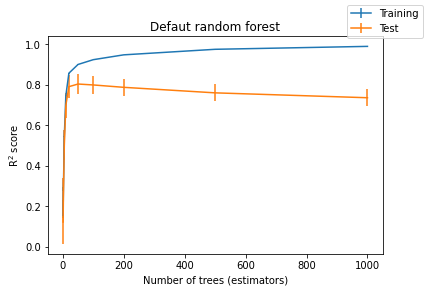

In [39]:
fig = plt.figure()
plt.errorbar(
    param_range, hgbr_train_scores.mean(axis=1),
    yerr=train_scores.std(axis=1),
    label='Training'
)

plt.errorbar(    
    param_range, hgbr_validation_scores.mean(axis=1),
    yerr=validation_scores.std(axis=1),
    label='Test',
)
plt.title('Defaut random forest')
plt.xlabel('Number of trees (estimators)')
plt.ylabel(r'R$^2$ score')
fig.legend()